<a href="https://colab.research.google.com/github/joseverajim/Actividad4.1/blob/main/Actividad4.2/Actividad4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- Actividad 4: Valores Atípicos ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Cargar archivo (ajusta el nombre al tuyo, por ejemplo "Pais.csv")
df = pd.read_csv("Tokyo_Limpia (1).csv")

# 2) Revisar estructura inicial
print("Columnas del dataset:\n", df.columns)
print("\nTamaño del dataset (filas, columnas):", df.shape)

# 3) Seleccionar solo columnas numéricas para analizar outliers
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas a evaluar:", num_cols)

Columnas del dataset:
 Index(['id', 'name', 'description', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'host_id', 'host_name',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_identity_verified',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated

In [2]:

# ======================
# Método A: Desviación Estándar (±3σ)
# ======================
df_std = df.copy()
for c in num_cols:
    mu = df[c].mean()
    sd = df[c].std(ddof=1)
    if sd == 0 or np.isnan(sd):
        continue
    df_std = df_std[(df_std[c] >= mu - 3*sd) & (df_std[c] <= mu + 3*sd)]

print(f"\nSTD (±3σ): {len(df)} filas originales -> {len(df_std)} después de eliminar outliers")

# Guardar CSV de este método
df_std.to_csv("Pais_outliers_std.csv", index=False)

# ======================
# Método B: Rango Intercuartílico (IQR)
# ======================
df_iqr = df.copy()
for c in num_cols:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    if IQR == 0 or np.isnan(IQR):
        continue
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df_iqr = df_iqr[(df_iqr[c] >= lower) & (df_iqr[c] <= upper)]

print(f"IQR (1.5·IQR): {len(df)} filas originales -> {len(df_iqr)} después de eliminar outliers")

# Guardar CSV de este método
df_iqr.to_csv("Pais_outliers_iqr.csv", index=False)




STD (±3σ): 22783 filas originales -> 17107 después de eliminar outliers
IQR (1.5·IQR): 22783 filas originales -> 5845 después de eliminar outliers


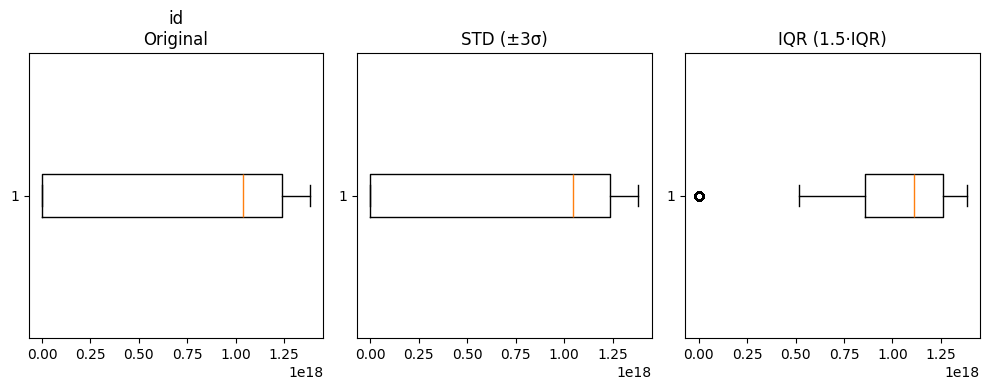

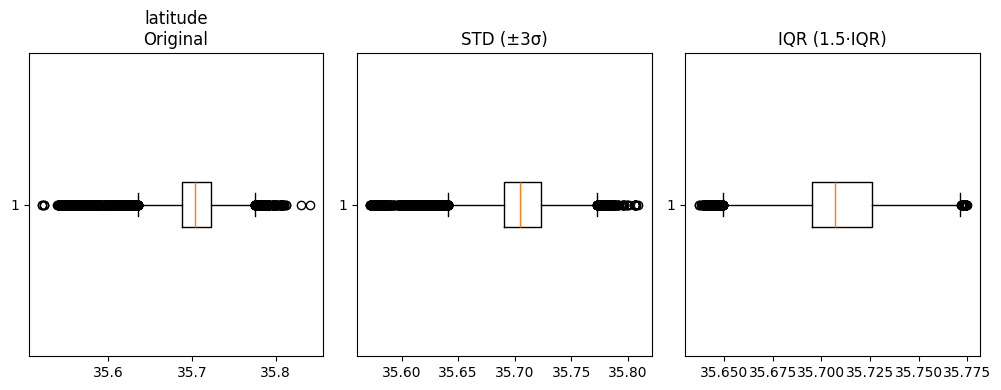

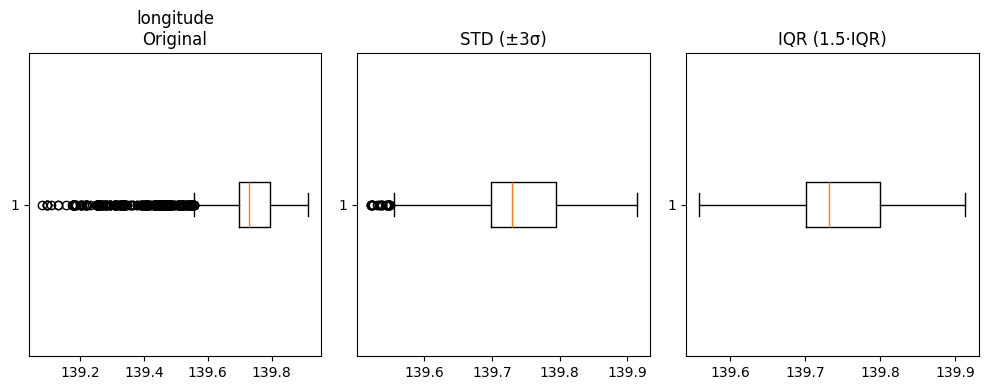

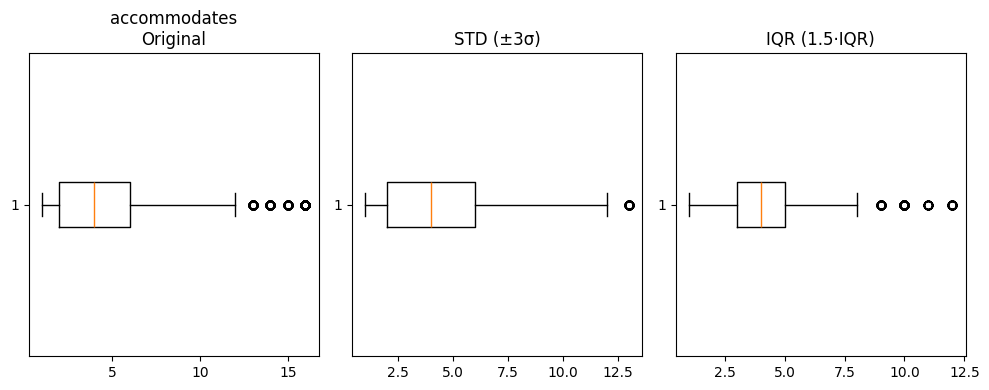

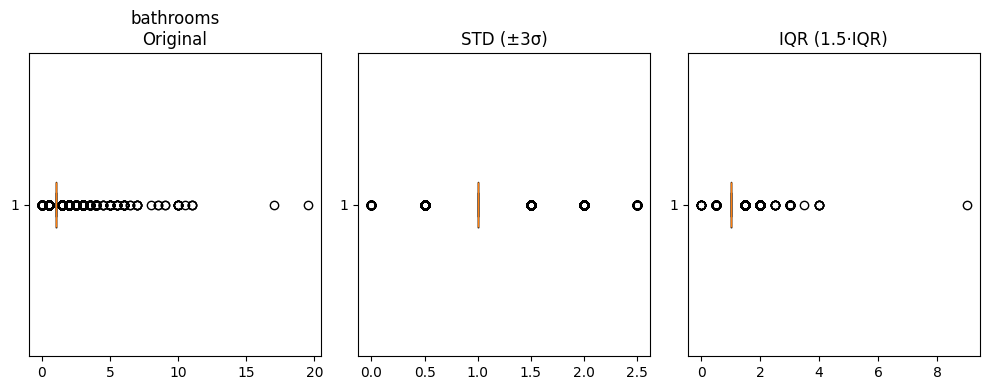

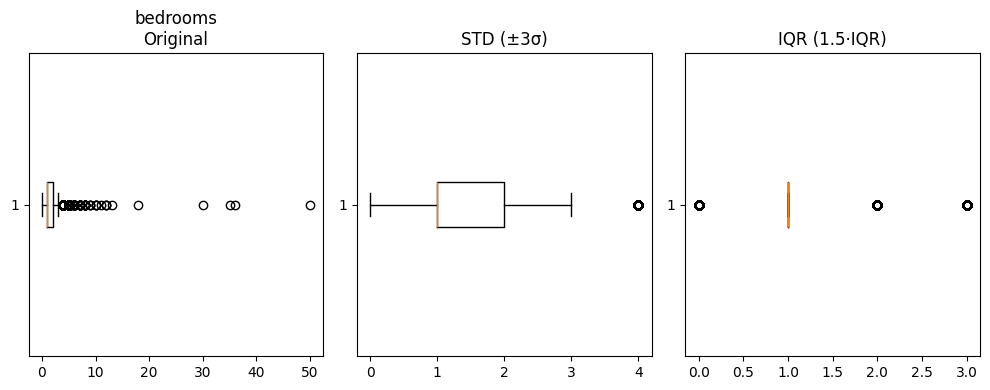

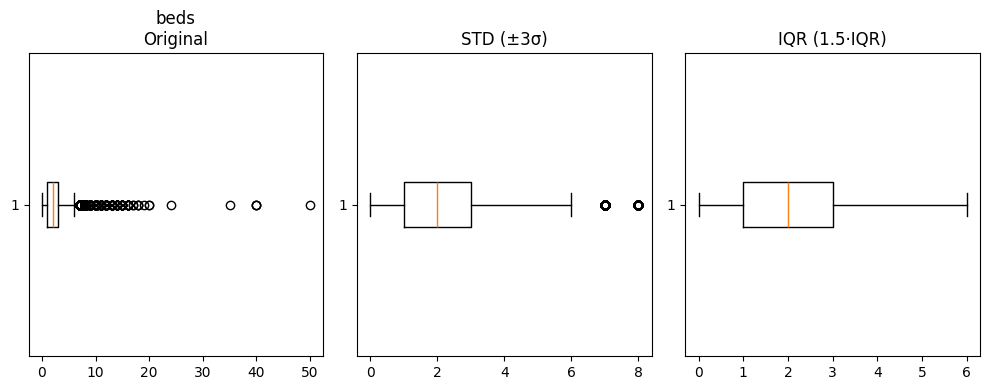

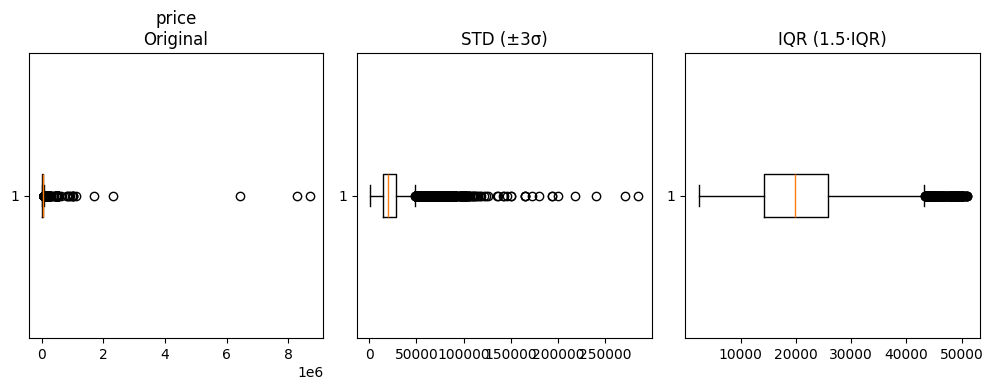

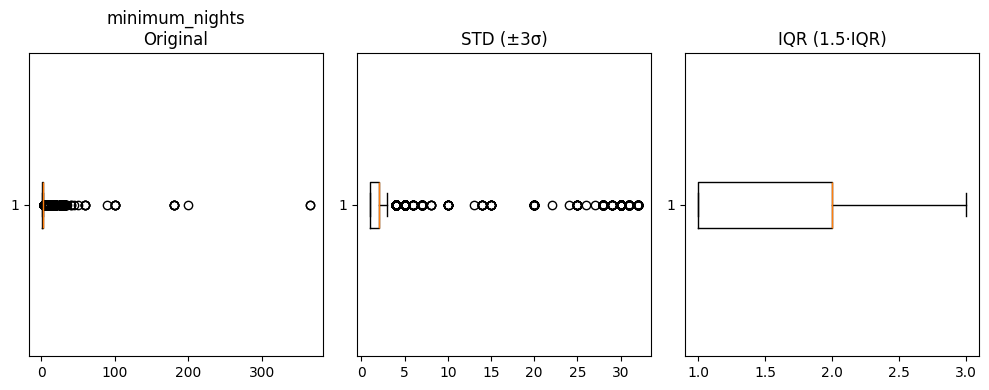

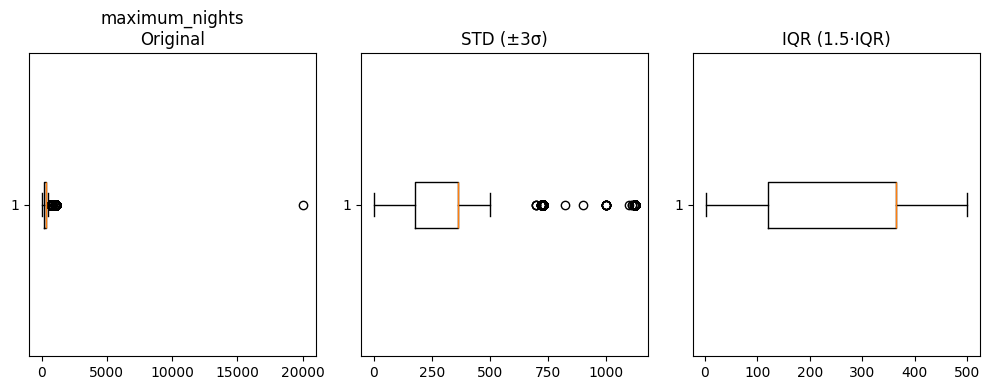

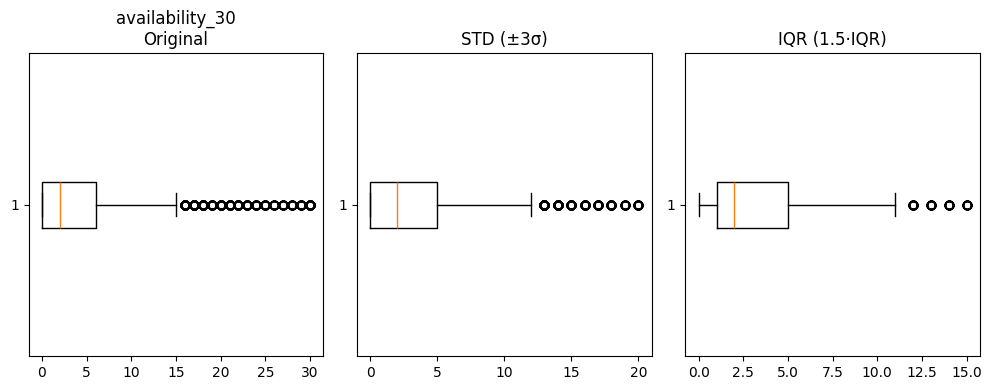

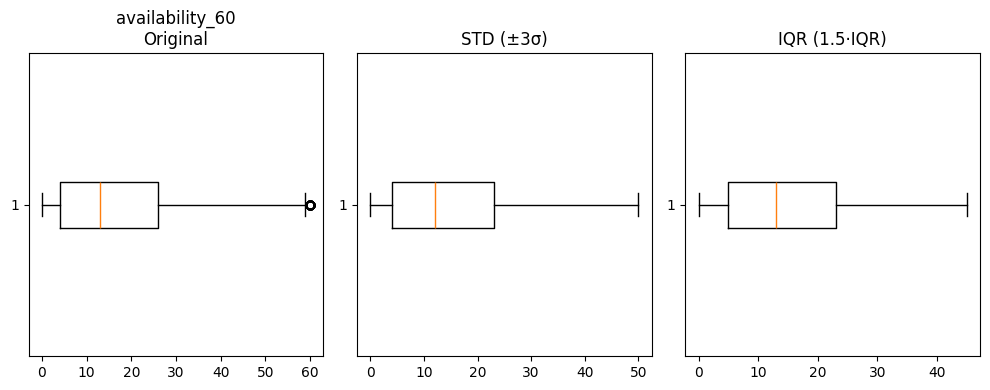

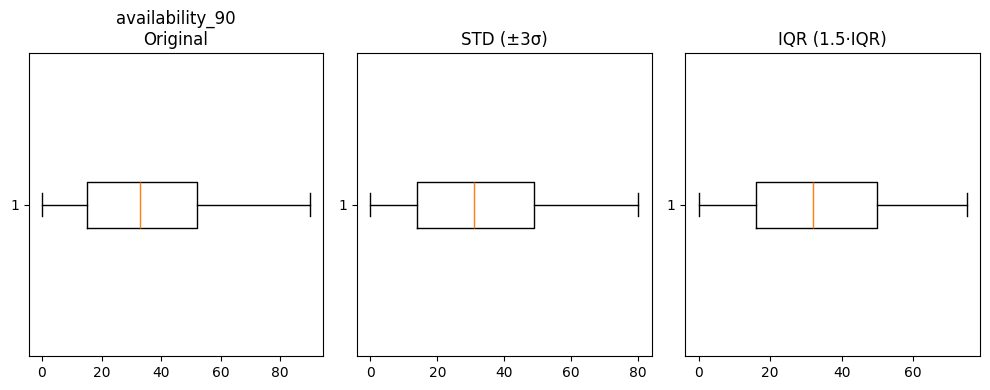

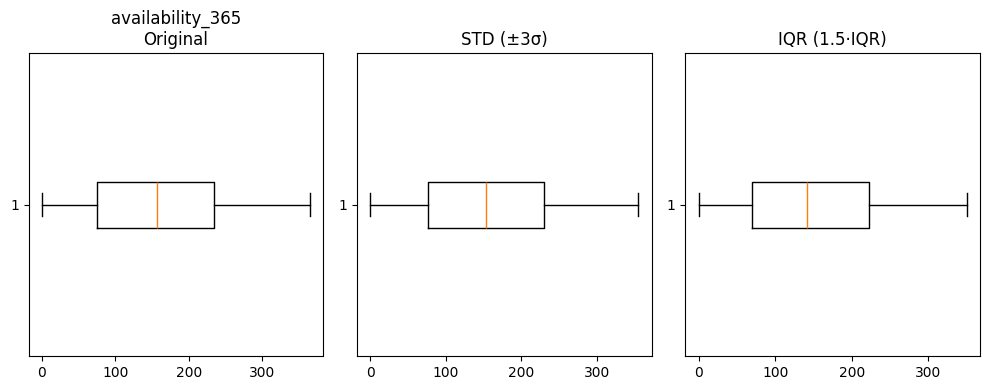

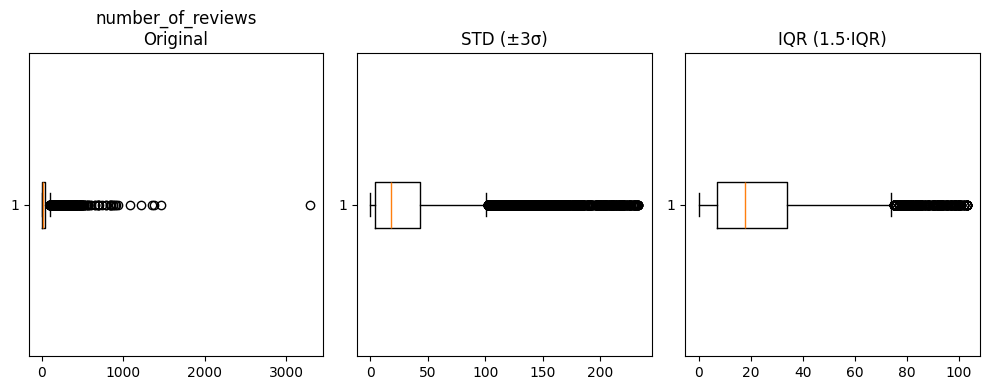

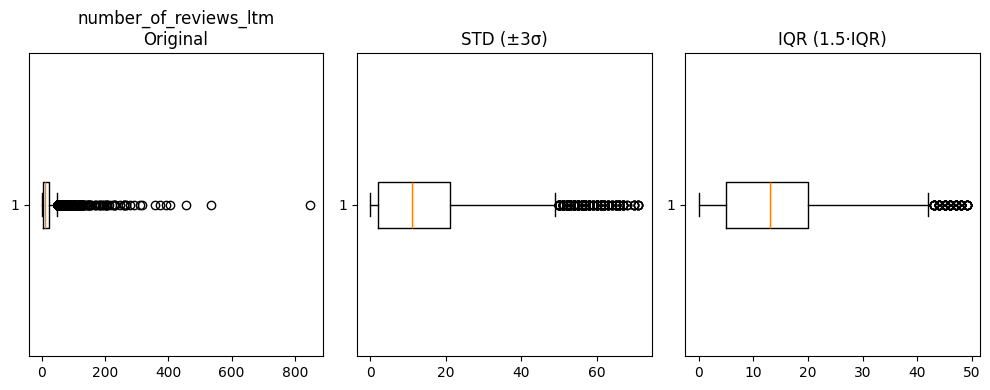

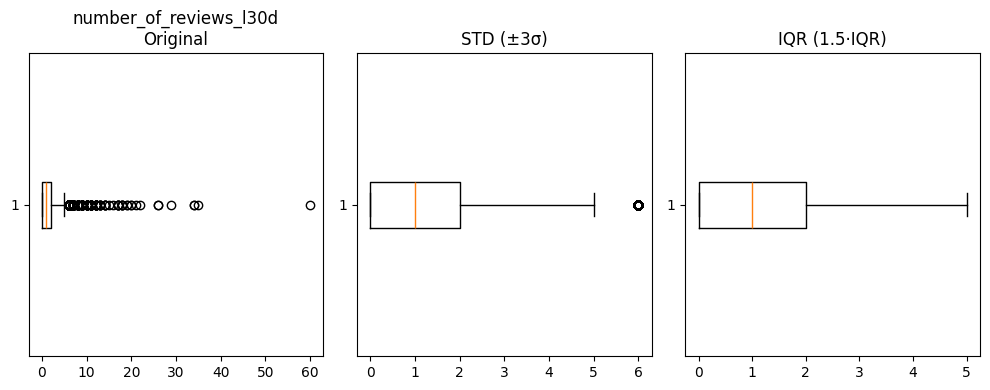

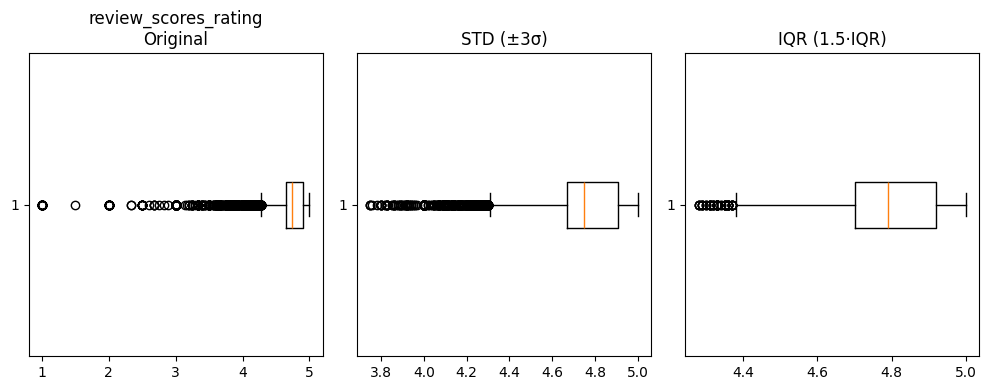

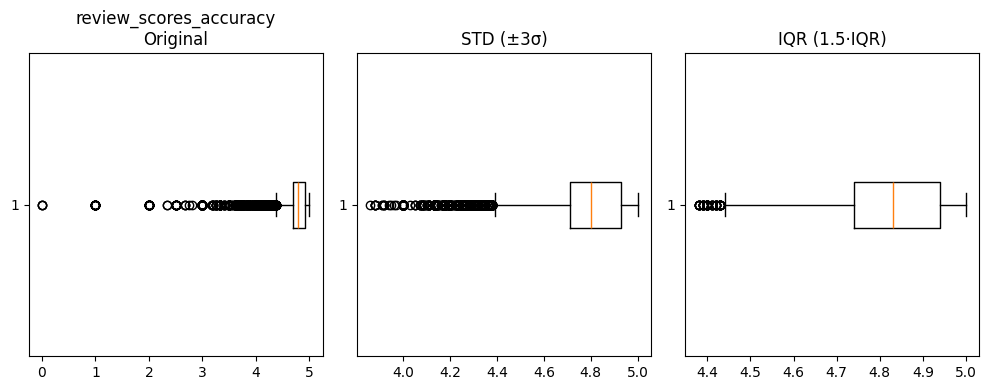

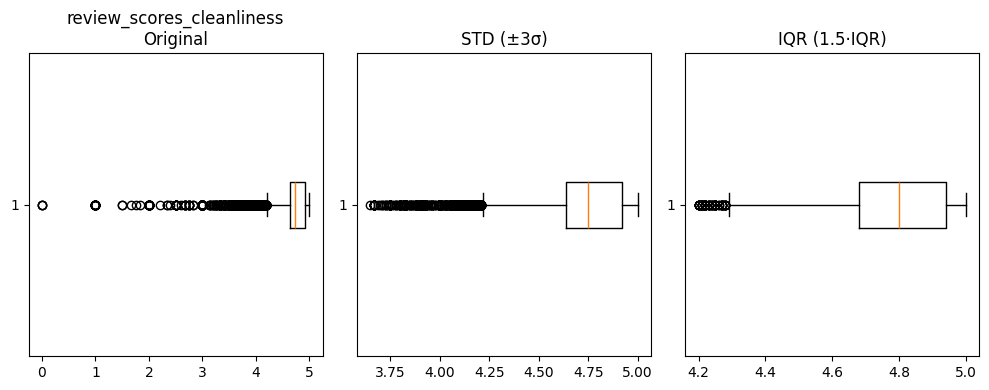

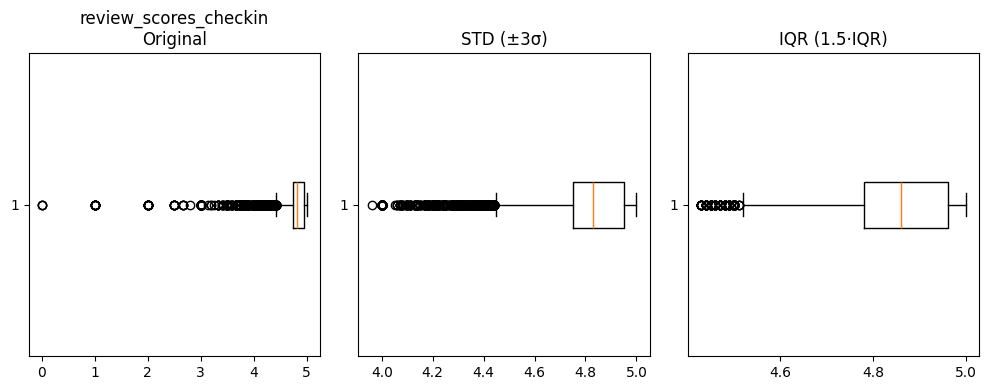

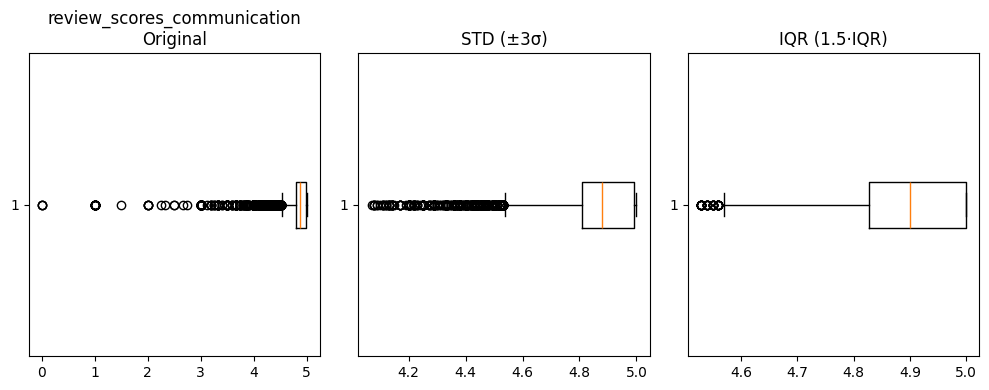

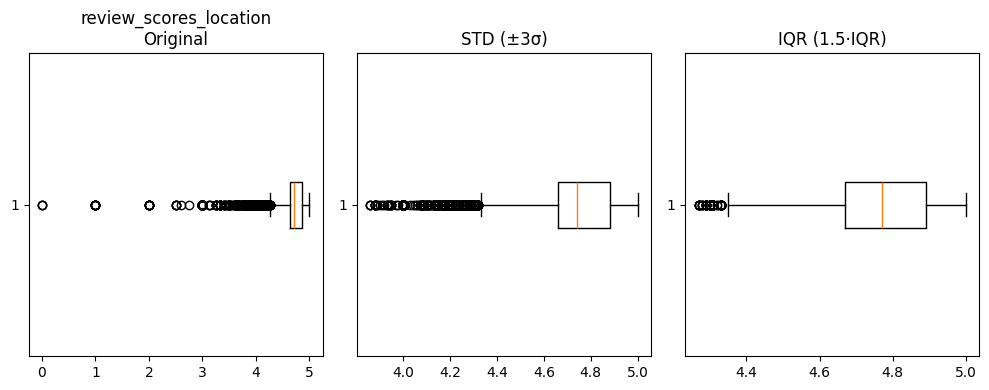

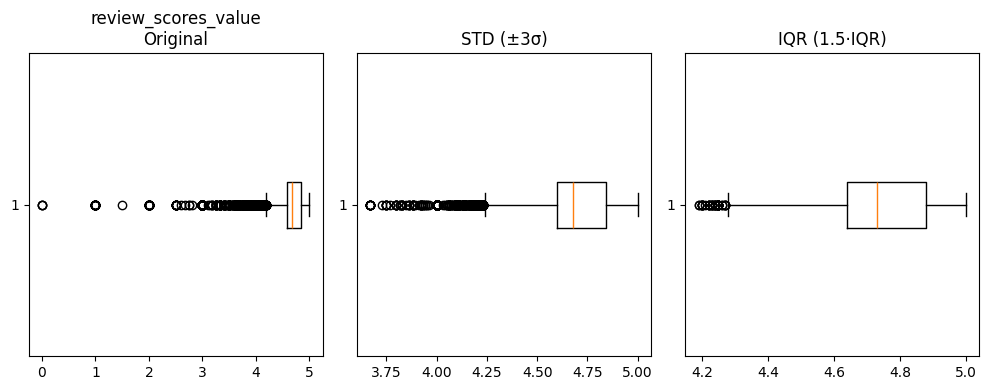

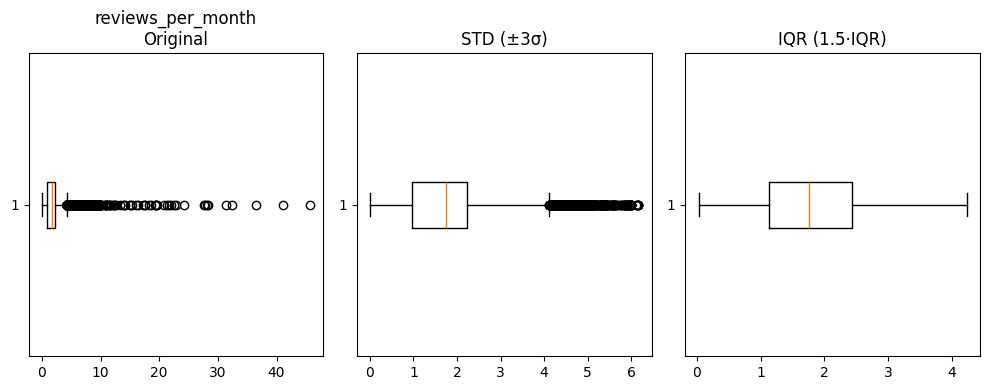

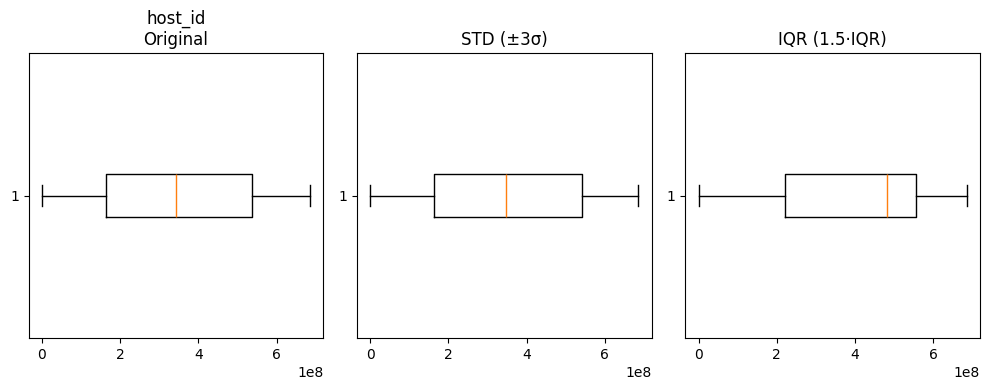

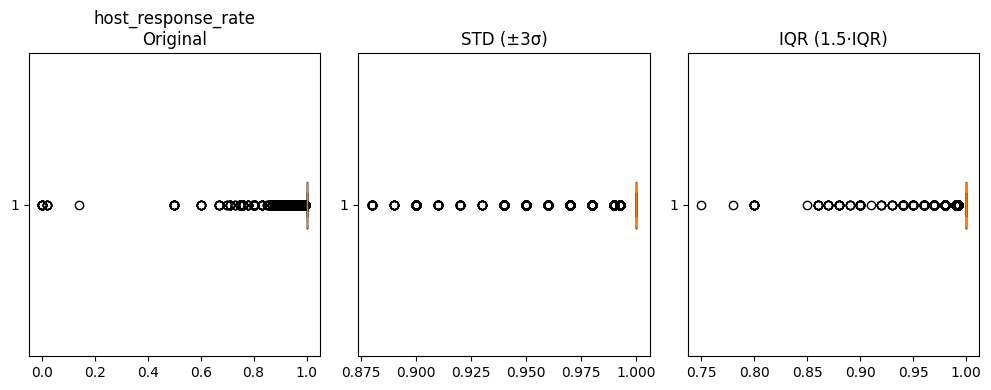

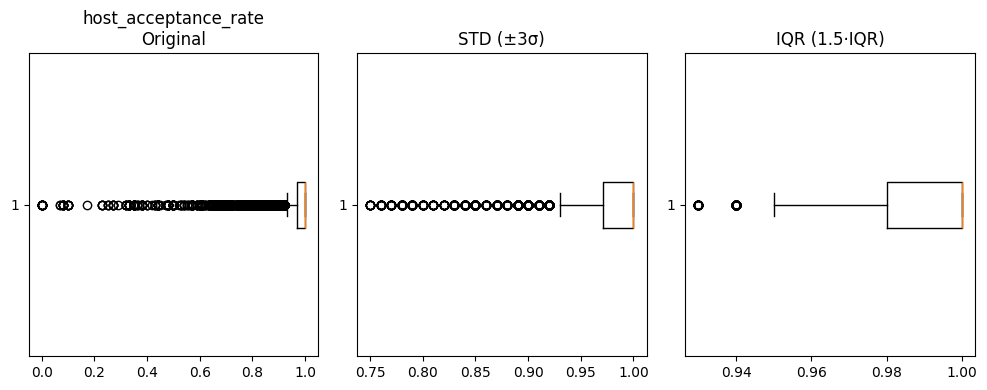

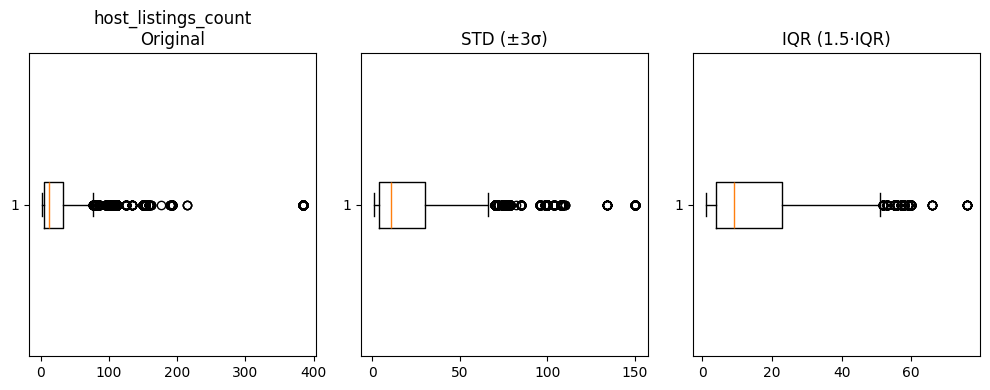

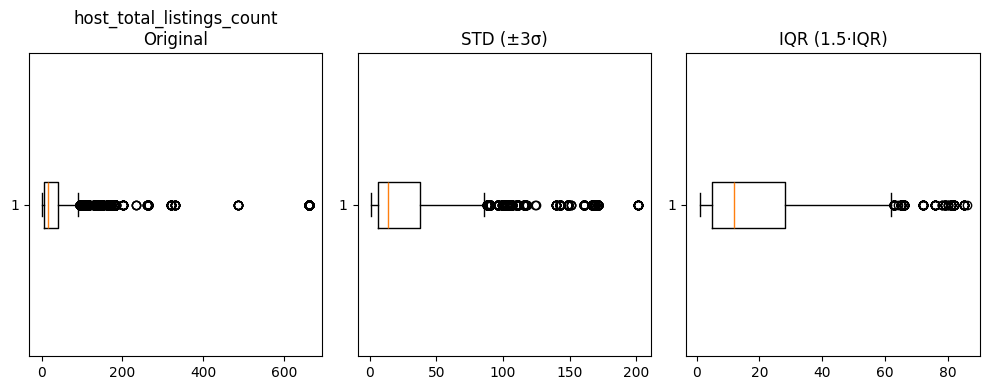

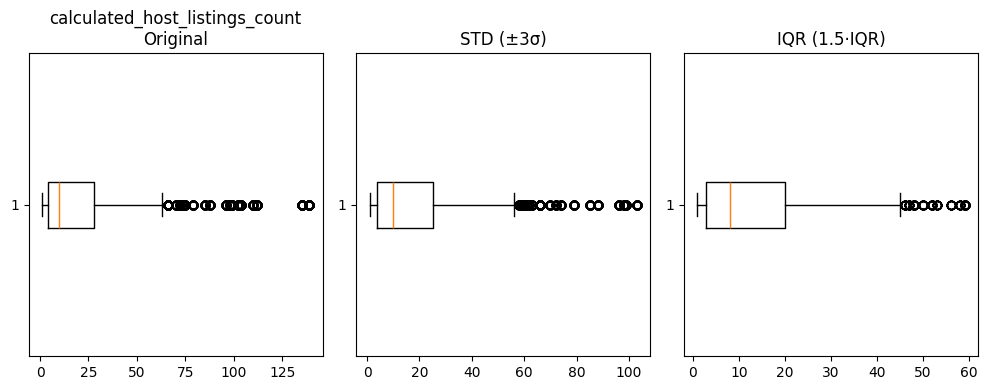

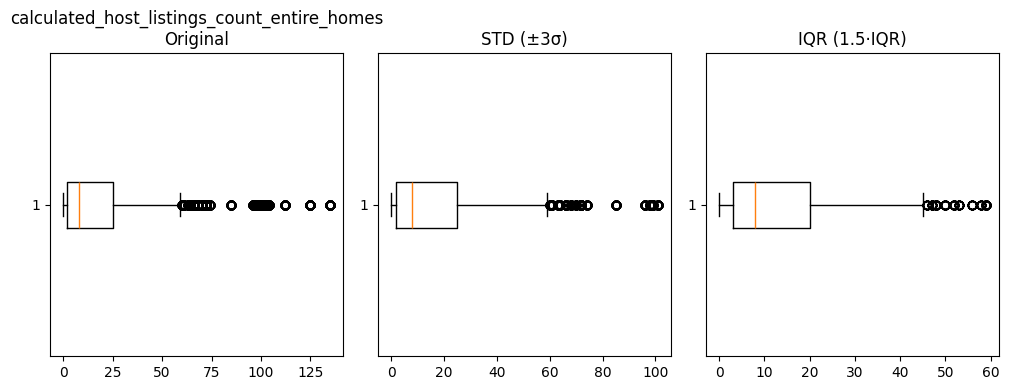

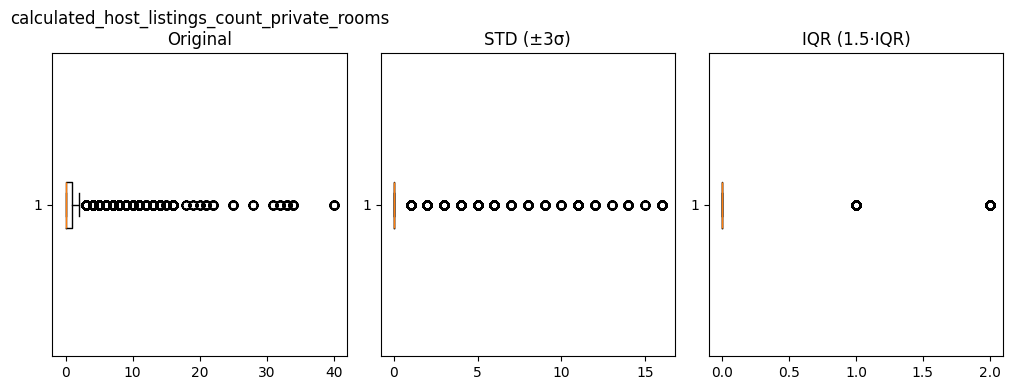

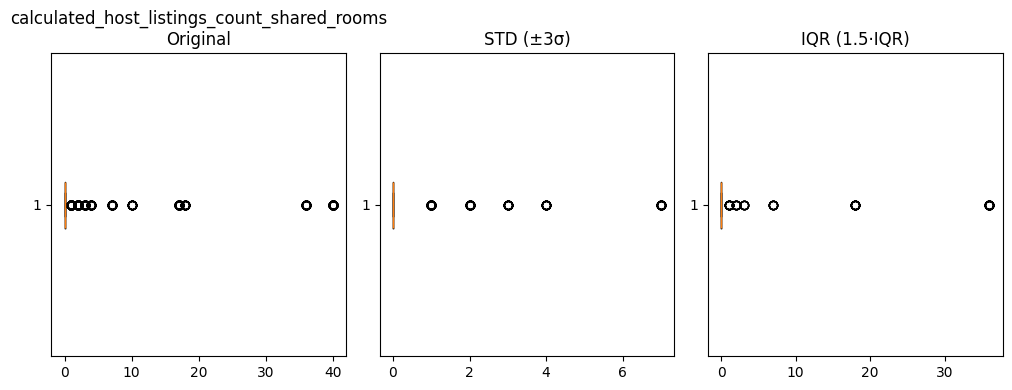

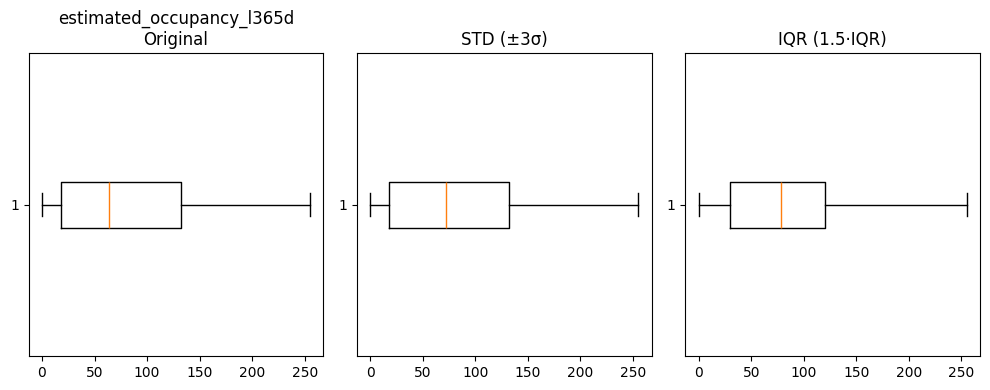

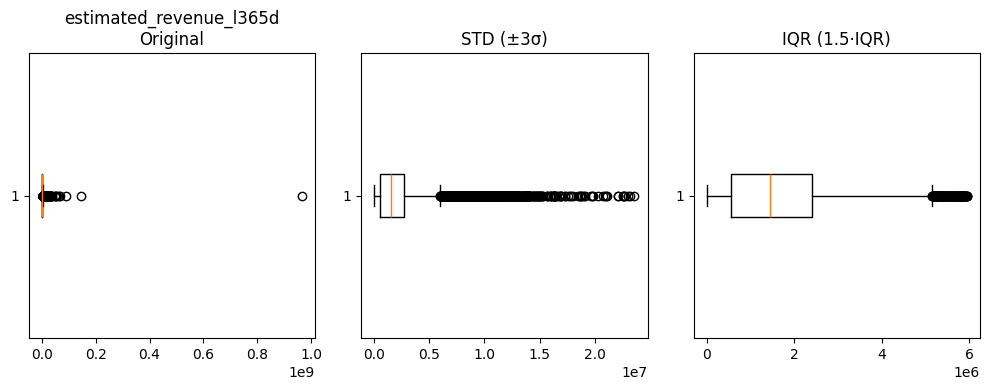

In [3]:
# ======================
# Comprobación gráfica con diagramas de caja
# ======================
for c in num_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,3,1)
    plt.boxplot(df[c].dropna(), vert=False)
    plt.title(f"{c}\nOriginal")

    plt.subplot(1,3,2)
    plt.boxplot(df_std[c].dropna(), vert=False)
    plt.title("STD (±3σ)")

    plt.subplot(1,3,3)
    plt.boxplot(df_iqr[c].dropna(), vert=False)
    plt.title("IQR (1.5·IQR)")

    plt.tight_layout()
    plt.show()

In [5]:
# --- Explicación de resultados ---

print("El dataset original tenía 22,783 filas. Al aplicar el método de Desviación Estándar (±3σ) se conservaron 17,107 filas, es decir, se eliminaron alrededor del 25% de los registros. En cambio, con el método de Rango Intercuartílico (IQR) solo quedaron 5,845 filas, lo que equivale a eliminar casi el 75% de la base. Esto ocurre porque el método IQR es mucho más estricto que el de Desviación Estándar. Para este caso, el método más adecuado es el de Desviación Estándar, ya que permite limpiar valores extremos sin perder tanta información del dataset.")

El dataset original tenía 22,783 filas. Al aplicar el método de Desviación Estándar (±3σ) se conservaron 17,107 filas, es decir, se eliminaron alrededor del 25% de los registros. En cambio, con el método de Rango Intercuartílico (IQR) solo quedaron 5,845 filas, lo que equivale a eliminar casi el 75% de la base. Esto ocurre porque el método IQR es mucho más estricto que el de Desviación Estándar. Para este caso, el método más adecuado es el de Desviación Estándar, ya que permite limpiar valores extremos sin perder tanta información del dataset.
